Taken from this [SE post](https://scicomp.stackexchange.com/questions/23536/quality-of-eigenvalue-approximation-in-lanczos-method). Note that the answers aren't great - here is what Teddy had to say:

**Me**: 
*Are you familiar with the fact that the Lanczos algorithm apparently does not capture the largest m eigenvalues of a matrix? I was under the impression that's what it did. This SE post is saying that it captures the largest and smallest eigenvalues*

**Teddy**:
*That's wrong. The algorithm converges to the eigenvalues that are the largest in absolute value. If the spectrum is roughly symmetric about zero then that's the algebraically highest and lowest values, but in general it goes to one end of the spectrum. I don't really understand the answer to the SE question.*

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def Lanczos( A, v, m=100 ):
    n = len(v)
    if m>n: m = n;
    # from here https://en.wikipedia.org/wiki/Lanczos_algorithm
    V = np.zeros( (m,n) )
    T = np.zeros( (m,m) )
    vo   = np.zeros(n)
    beta = 0
    for j in range( m-1 ):
        w    = np.dot( A, v )
        alfa = np.dot( w, v )
        w    = w - alfa * v - beta * vo
        beta = np.sqrt( np.dot( w, w ) ) 
        vo   = v
        v    = w / beta 
        T[j,j  ] = alfa 
        T[j,j+1] = beta
        T[j+1,j] = beta
        V[j,:]   = v
    w    = np.dot( A,  v )
    alfa = np.dot( w, v )
    w    = w - alfa * v - beta * vo
    T[m-1,m-1] = np.dot( w, v )
    V[m-1]     = w / np.sqrt( np.dot( w, w ) ) 
    return T, V

In [3]:
# ---- generate matrix A
n = 100;
sqrtA = np.random.rand( n,n ) - 0.5
A = np.dot( sqrtA, np.transpose(sqrtA) )
# ---- full solve for eigenvalues for reference
esA, vsA = np.linalg.eig( A )
esA = np.sort(np.abs(esA))

In [4]:
# ---- approximate solution by Lanczos
eig_list = []
m_list = []
for m in range(10,n,5):
    m_list.append(m)
    v0   = np.random.rand( n ); v0 /= np.sqrt( np.dot( v0, v0 ) )
    T, V = Lanczos( A, v0, m=m )
    esT, vsT = np.linalg.eig( T )
    VV = np.dot( V, np.transpose( V ) ) # check orthogonality
    eig_list.append(np.sort(np.abs(esT)))

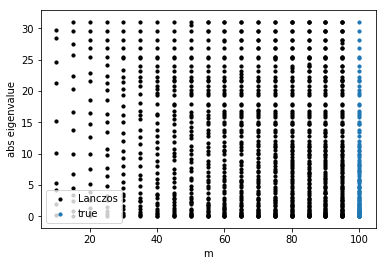

In [5]:
[ plt.scatter(m_list[im]*np.ones(m_list[im]), np.abs(eig_list[im]), color='k', s=10) for im in range(len(m_list)-1)]
plt.scatter(m_list[len(m_list)-1]*np.ones(m_list[len(m_list)-1]), \
            np.abs(eig_list[len(m_list)-1]), color='k', s=10, label='Lanczos')
plt.scatter(n*np.ones(n), np.sort(np.abs(esA)), s=10, label='true')
plt.ylabel('abs eigenvalue')
plt.xlabel('m')
#plt.xlim(0,n+20)
plt.legend(loc='lower left')
plt.show()

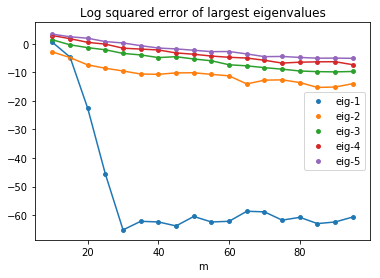

In [6]:
p = 5
errors = [[ np.log((eig_list[im][-1+j] - esA[-1+j])**2) for im in range(len(m_list))] for j in range(p)]
[ plt.scatter(m_list, errors[j], label='eig-' + str(j+1), s=15) for j in range(p)]
[ plt.plot(m_list, errors[j]) for j in range(p)]
plt.title('Log squared error of largest eigenvalues')
plt.xlabel('m')
plt.legend()
plt.show()